# Homework 2: Descriptive Statistics and Plots

Welcome to the second homework! Please complete this notebook by filling in the cells provided. For all problems that you must write explanations and sentences for, please provide your answer in the designated space. 

**Required Reading:**
- [Excerpt from "Data and the American Dream"](https://github.com/emeyers/YData/raw/main/ClassMaterial/reading/data_and_the_american_dream_reading.pdf)


**Recommended Reading:**
- [Chapter 2: Programming in Python](https://matthew-brett.github.io/dsfe/chapters/02/to_code)


**Deadline:**

This assignment is due **Friday, July 04 at 10pm in Gradescope.** 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. 

## Getting started

In order to complete the homework it is necessary to download a few files. Please run the code below **only once** to download data needed to complete the homework. To run the code, click in the cell below and press the play buttom (or press shift-enter). 


In [1]:
# If you are running this notebook in Google colab, please uncomment and run the following line.
# (If you are using the YCRC JupyterHub server or running Anaconda on your own computer you can ignore this section).

# !pip install https://github.com/emeyers/YData_package/tarball/master

In [2]:
# Please run this code once to download the files you will need to complete the homework 

import YData 
YData.download.download_data("ACS_2017_sample_01.csv")


## 1. The American Community Survey (ACS)

The book "Data and the American Dream" by Matthew Holian replicates results from several published papers that analyzed the American Community Survey (ACS). Please read the excerpt from this book [found here](https://github.com/emeyers/YData/raw/main/ClassMaterial/reading/data_and_the_american_dream_reading.pdf) in order to understand the ACS dataset, which is a dataset we will use on this, and a few subsequent homework assignments. 

While you are reading, please also write down one quote that you find interesting from the chapter. Then in the space below, write down the quote as well as a one paragraph description for why you thought the quote was interesting. 

**Question 1.1 (5 points)**  Please write down your "quote and reaction" here.

*Quote:*  At this point, most students can't change who they are, but they do have to decide what to major in.

Reaction: I am totally with this quote. I choose this sentence not only because it shows the fact that many students today are facing when they graduate from high school, but also for it reflects some ideas about economics and data science. For instance, it leads me to think about fixed effect and stuffs like that.



**Question 1.2 (6 points):** Please also write down 3 *interesting* quesitons that could potentially be addressed using the ACS data. 

<font color='red'> **ANSWER**: 
  
1.   Compared to those coastal states，is there a significant difference in income for those who live in inland state?

2.   Is there a positive relationship between year of immigration and the education attainment? (this is interesting because it is about politics and human rights, which i consider to be important.)

3.   Is there a relationship between marital status and the type of ownership of the house(rent or own)? I consider this to be interesting since in my hometown, people always buy new flat when they get married and I have learnt that things are not the same in US. I would like to find this out if I could.


## 2. Warmup: SAT or ACT? (5 points)

SAT-Math scores are normally distributed with a mean of 500 and standard deviation of 100. ACT-Math scores are normally distributed with a mean of 18 and standard deviation of 6. 

A student has taken both tests. They scored 600 on the SAT-Math and 22 on the ACT-Math. Please calculate z-scores and print out these z-score values to "show your work". Then in the answer section, report which test score is most impressive. 

**Don't confuse between Standard Normal distribution and Normal Distribution** The standard normal distribution has mean $0$ and standard deviation $1$. However, a non-standard normal distribtution (simply called normal distribution) can have a non-zero mean and standard deviation any positive number. 

In [9]:
z_sat = (600-500)/100
z_act = (22-18)/6
print(z_sat)
print(z_act)
if z_sat < z_act:
    print("act is more impressive")
else:
    print("sat is more impressive")





1.0
0.6666666666666666
sat is more impressive


<font color='red'> **ANSWER**: SAT is more impressive





## 3. Analyzing categorical data using American Community Survey (ACS) data

In part 1 of this homework you read an excerpt from "Data and the American Dream" which described the American Community Survey (ACS) data. Let's now calculate some statistics on this data. 

The code below loads ACS data from 10,000 randomly sampled participants into a "pandas DataFrame" which is a data structure that is useful for Table data (we will discuss pandas DataFrames in a couple of weeks). There is also code that converts this data into Python lists, which hopefully you are now familiar with. In particular, the code creates three lists which are:  

- `hh_incomes`: contains the household income for each of the 10,000 randomly selected participants
- `ages`: contains the ages for each of the 10,000 randomly selected participants
- `sex`: contains the sex for each of the 10,000 randomly selected participants

Note: these Python lists are in order, so that, for example, the first item of the `incomes` list comes from the same person as the first item in the `sex` list. 


In [7]:
# This code loads the ACS data into a pandas DataFrame.
# The cell contains code that hasn't been covered in the course yet but we will discuss it soon. 

import pandas as pd
acs_data1 = pd.read_csv("ACS_2017_sample_01.csv")
acs_data1.head()


YEAR  SAMPLE   SERIAL       CBSERIAL  NUMPREC  HHWT  HHTYPE        CLUSTER  \
0  2017  201701   250395  2017000834943        2    79       2  2017002503951   
1  2017  201701  1062813  2017000532479        2    27       1  2017010628131   
2  2017  201701  1235164  2017001001296        1    48       6  2017012351641   
3  2017  201701   142278  2017000769070        3    50       1  2017001422781   
4  2017  201701   954089  2017000012970        5    15       1  2017009540891   

   CPI99  STATEFIP  ...  CLASSWKR  CLASSWKRD  WKSWORK2  UHRSWORK  INCBUS00  \
0  0.679         9  ...         2         28         0         0         0   
1  0.679        42  ...         0          0         0         0         0   
2  0.679        48  ...         1         13         1         2        50   
3  0.679         6  ...         2         22         3        35         0   
4  0.679        39  ...         1         13         2        21      1800   

   INCEARN  SEI  MOVEDIN  QBPL  QINCWAGE  
0        0   72        7     0         0  
1        0    0        5     0         0  
2      150   22        4     0         0  
3    17900   68        0     0         4  
4     1800   26        0     0         0  

[5 rows x 61 columns]

In [9]:
# This code converts pandas DataFrame data into Python lists so that we can analyze the data

hh_incomes = acs_data1["HHINCOME"].to_list()
ages = acs_data1["AGE"].to_list()
sex = acs_data1["SEX"].to_list()

**Question 3.1 (3 points)** To start, let's get a little sense of the data. To do this, simply print the first 5 values from the `hh_incomes`, `ages` and `sex` lists. Be sure to print exactly 5 elements.

In [14]:
# print the incomes, ages and sex of the first 5 people (and exactly 5)
print(hh_incomes[0:5])
print(ages[0:5])
print(sex[0:5])

[118020, 35300, 8550, 245900, 69800]
[74, 73, 55, 25, 17]
[1, 2, 2, 2, 2]


**Question 3.2 (4 points)** Let's now explore some categorical data related to the sex of individuals in our sample of data. Please create a name called `num_males` that has the number of males in the data set, and a name called `num_females` that has the number of females in the data set. Then print these values out to "show your work". Note that Males are coded as $1$ and Females as $2$. 

Hint: Suppose you had a list called `my_list` with the following values: `my_list = ["a", "b", "a", "a", "b", "a", "a"]`. You could count how many times `"a"` occurs in this list using the following syntax: `my_list.count("a")`



In [24]:
num_males = sex.count(1)   #num of males
num_females = sex.count(2) #num of females
print(f"{num_males} males")
print(f"{num_females} females")

4900 males
5100 females


**Question 3.3 (4 points)** Next let's calculate the *proportion* of people in our data sample who are female (recall that the proportion is the number in a category divided by the total number of items). Please calculate this value and print it out to "show your work". 


In [26]:
print(num_females/(num_females+num_males))

0.51


**Question 3.4 (4 points)** Now let's create a few visualizations of our categorical data. To start, please create a bar chart that plots the counts of the the number of males and females in the data set. As always, label your axes!

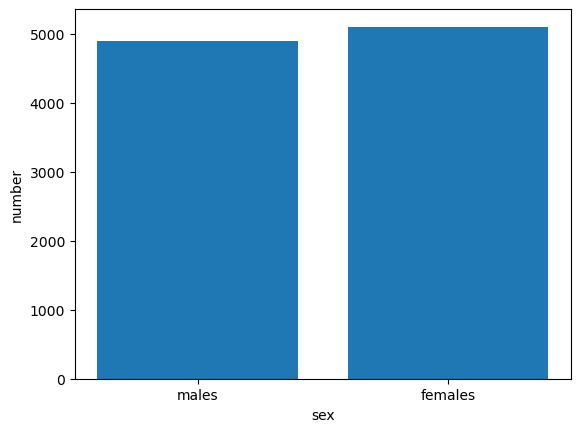

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(['males','females'],[num_males,num_females]);
plt.xlabel("sex");
plt.ylabel("number");

**Question 3.5 (5 points)** Finally, create a pie chart that displays the number of males and females. Also make sure that the sections of the pie chart are labeled to indicate which section corresponds to males and which corresponds to females. 

In the answer section below, report whether you think it is better to use a bar chart or a pie chart to visualize this data and explain your reason(s) why. 

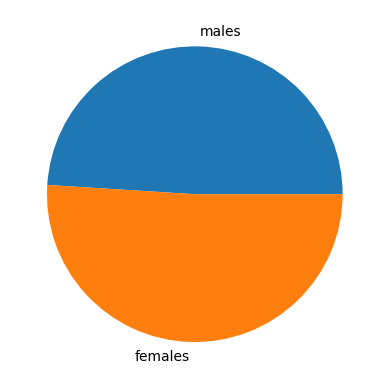

In [41]:
plt.pie([num_males,num_females],labels=["males","females"]);



<font color='red'>  **ANSWER**: I think it is better to use a pie chart to visualize this data. The reason is derived from the kind of data we are now processing: sex is exclusive, i.e. the sum of it must be 100%, and we focus on the ratio of each sex rather than the absolute value. Thus, pie chart might be a better choice.




## 4. Exploring a single quantitative variable using the ACS data 

Let's continue to visualize and calculate statistics on quantiative data using our ACS data sample.

**Question 4.1 (6 points)** To start, let's calculate the mean and the median of the `hh_incomes` values from our ACS data sample. 

To calculate the values of the mean and the median, we can use the `statistics` module which comes with current version of The Python Standard Library (if you are interested, a list of all the modules that come with current version of Python can be [found here](https://docs.python.org/3/library/)). The code below imports the `statistics` module, which will allow you to use the functions `statistics.mean()` and `statistics.median()` to calculate these statistics. 

Use the code section below to calculate and print these statistics. Then, in the text answer section below, report:
1. The value of these statistics. 
2. Which gives a better sense of what one might describe as the "typical" income.
3. Give (the most compelling) reason for why these statistics appear to be quite different using information from the "Data and the American Dream" reading. Creating a histogram of the income data could also be useful for gaining some insight into why the mean and median are different. 


556638.3495
77500.0


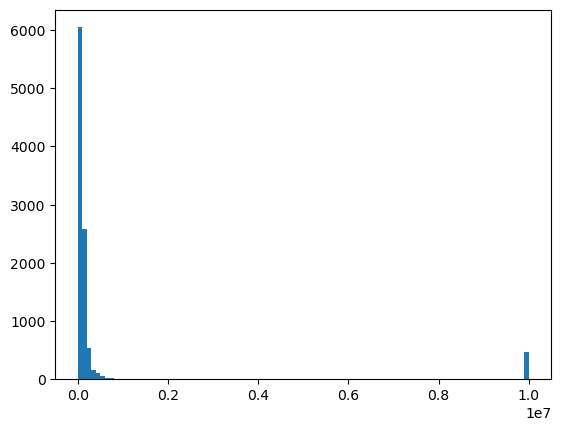

In [58]:
import statistics
print(statistics.mean(hh_incomes))
print(statistics.median(hh_incomes))

plt.hist(hh_incomes,bins=100);

<font color='red'>**ANSWER**: 
    
1. mean = 556638.3495; median = 77500
    
2. The median might give a more "typical" income since the income distribution are always right skewed and median provide a more robust esitimation than mean in this case.
    
3. As it shown in the histogram, the income is heavyly right skewed, which means a very tiny part of rich people "drag" the average income to a higher level and makes mean and median a big difference.


</font>


**Question 4.2 (8 points)** Now let's calculate the median **age** without using `median()` function. To do this, sort the values in the `ages` list using the list's `sort()` method, and then calculate the median from this sorted list. 

Note: the `list.sort()` method sorts the data "in place" where it overwrites the original data with the sorted data. If you wanted to keep the data in the original order, you would have to create a copy of the list using the lists' `copy()` method.

In [85]:
ages.sort()
if len(ages)%2 == 1:
    ages_median = ages[(len(ages)+1)/2]
else:
    ages_median = (ages[int(len(ages)/2)]+ages[int(len(ages)/2+1)])/2
print(ages_median)

41.0


**Question 4.3 (3 points)** Finally, create a histogram of all the ages of people in the data set. As always, be sure to label your axes!


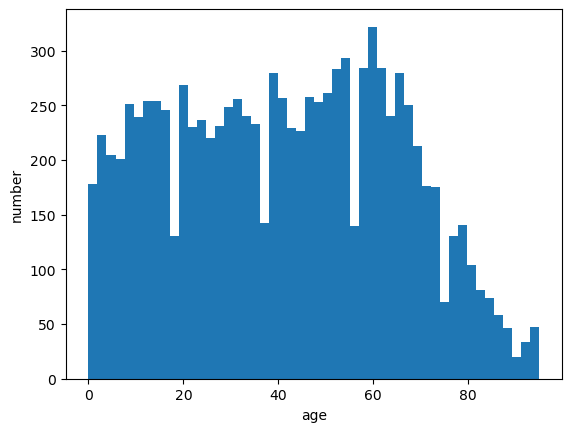

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(ages,bins=50);
plt.xlabel("age");
plt.ylabel("number");

## 5. Exploring the relationship between two quantitative variables using the ACS data 

Let's now visualize and calculate statistics on the relationship between two quantiative data using our ACS data sample. In particular, let's look at the relationship between the amount of rent paid and household income. 

To do this, we will *only use data from individual who pay rent, and who have a yearly household income of less than $200,000* (and all missing values will be omitted). 

The code below extracts lists that contain this information. In particular it creates the following lists:

- `rent_amount`: The amount of rent paid
- `hh_income_rent_payers`: The househould income of people who pay rent 


In [101]:
pays_rent_and_makes_under_200k = (acs_data1["RENT"] != 0) &  (acs_data1["HHINCOME"] < 200000)   # only respondants who pay rent

rent_amount = acs_data1["RENT"][pays_rent_and_makes_under_200k]  # amount of rent paid

hh_income_rent_payers = acs_data1["HHINCOME"][pays_rent_and_makes_under_200k]  # house hold income for those paying rent


**Question 5.1 (3 points)** To start this question, please print out the number of people that are included in our `rent_amount` list (i.e., the number of people in our sample who paid rent and had a household income under $200,000).

In [103]:
len(rent_amount)


2557

**Question 5.2 (5 points)** Next, create a histogram of the amount of rent paid by individuals included in the `rent_amount` list. Make sure your histogram has 20 bins, and has black edges between the bars. 

From looking at the histogram, report in the answer section whether the mean or the median is larger?

Reminder: As always, be sure to label your axes!


Text(0, 0.5, 'number')

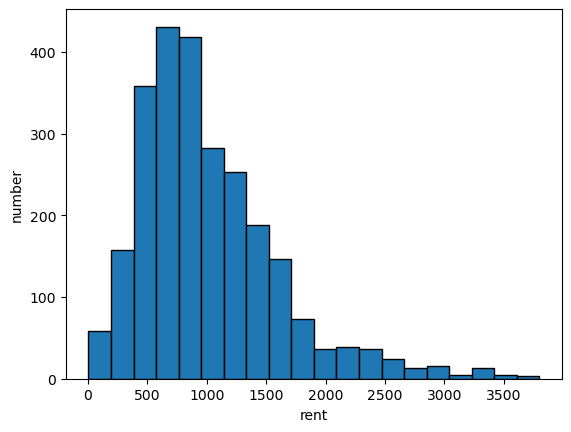

In [117]:
plt.hist(rent_amount,bins=20,edgecolor="black");
plt.xlabel("rent")
plt.ylabel("number")

<font color='red'>**ANSWER**: The mean is larger since it is right skewed.




**Question 5.3 (5 points)** Now create a scatter plot where the household income is on the x-axis and the amount of rent paid is on the y-axis. <font color='red'>**Do not calculate the correlation yet**.</font> Instead, based on looking at this scatter plot, take your best guess at what would you think the correlation between household income and rent is. Then, in the answer section write down what your estimated correlation is.  

Hint: If you're not confident in your ability to estimate correlations based on looking at scatter plots, you could try playing the [Guess the correlation game](https://www.stapplet.com/guesscorr.html)


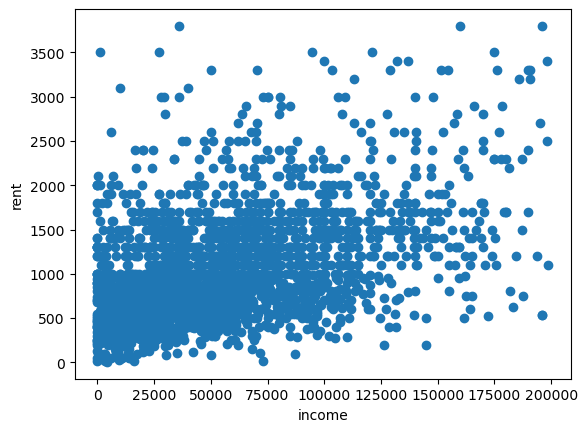

In [156]:
plt.scatter(hh_income_rent_payers,rent_amount);
plt.xlabel("income");
plt.ylabel("rent");

<font color='red'>**ANSWER**: the correlation is probably 0.6




**Question 5.4 (5 points)** It is (likely) a bit hard to tell what the correlation is from looking at the scatter plot you created in the previous question. A few reasons that make it hard to read the prevouis scatter plot is because there is a lot of overplotting of the points and the rent values most frequently occur at particular values creating bands in the plot. Let's see if we can alleviate these problems and make the relationship a little easier to see by recreating out plot using the following additional arguments:

1. Make each point in the scatter plot larger by setting the `markersize` argument to 50
2. Make each point more transparent by setting the `alpha` argument to 0.01

Once you created this plot, in the answer section: 
- Again write down in the answer section what your best guess of what you think the correlation between household income and rent is. 
- Briefly state if you think this new plot makes it easier to see the relationship. 

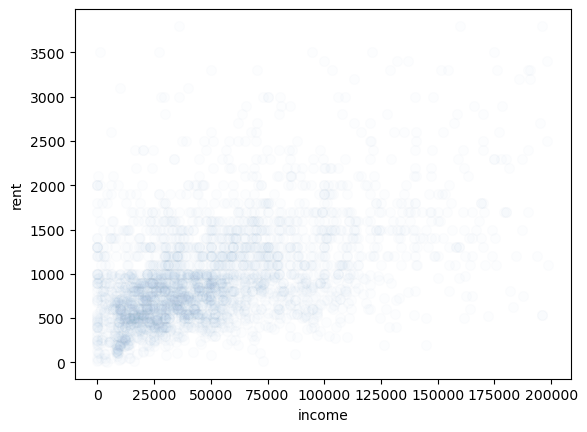

In [158]:
plt.scatter(hh_income_rent_payers,rent_amount,s=50,alpha=0.01);
plt.xlabel("income");
plt.ylabel("rent");

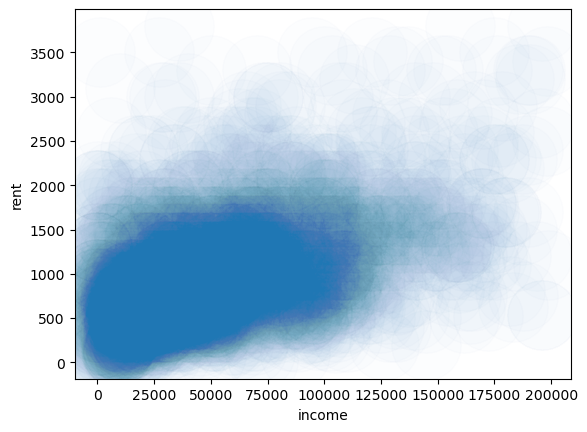

In [160]:
plt.plot(hh_income_rent_payers,rent_amount,"o",markersize=50,alpha=0.01);
plt.xlabel("income");
plt.ylabel("rent");

<font color='red'>**ANSWER**: My guess is 0.5. I agree that the new plot does help me to see the relationship more clearly, because the new chart shows the part which has a lot overlay more clearly.






**Question 5.5 (3 points)** Finally, please go ahead and actually calculate the correlation using the `statistics.correlation(x, y)` function. 

In the answer section, please briefly comment on whether you think your estimated correlations you reported above seemed good.


In [166]:
statistics.correlation(hh_income_rent_payers,rent_amount)

0.46703577481994046

<font color='red'>**ANSWER**: I consider my estimation to be good since there is only less than 10% error.




## Part 6: Explore your own question on the ACS data (5 points)
 
In part 1 of this homework you wrote down three interesting questions that could be addressed using the ACS dataset. Now, please use Python to give some insight into one of the questions you posed by calculating statistics and/or creating plots of the data.   

In the answer section below please describe: 

1. The question you are addressing
2. How your analysis gives insight into the question
3. Limitations of your analysis/plots.
4. Any additional abilities you wish you had that would help you be able to better answer your question (e.g., you might wish you could limit the data to only a subset of the data, etc.). 

As always, be sure to "show your work" by printing out relevant values, and also make sure your code is easy to understand by using meaningful names and by adding comments. 

Notes: 

1. To better understand the data, please refer to the codebooks in "Data and the American Dream" the more comprehensive codebook found at: https://usa.ipums.org/usa/volii/codebooks.shtml. Also, note that sometimes the information in these cookbooks does not exactly correspond to the data we have, so if it is unclear what levels of particular variables mean, you can just say this when you describe your results. 

2. It could be useful to extract additional lists of data from the `acs_data1` DataFrame. For example, you might want to create a list that has the number of rooms in each person's house. To do this, please look at the code that created the list of `hh_incomes`, `ages`, `sex` above, and if you can't figure it out please ask questions on Ed. Later in the semseter we will discuss exactly how this code works, but for how you can "hack" your way to creating relevant lists of data without fully understanding this one piece of code. 

3. There is a fair amount freedom to the degree that you challenge yourself here, and we will be relatively relaxed on the grading of this question. If you find the questions in this homework were easy, feel free to read about additional features of Python (e.g., how to change the colors in plots, etc.) and experiment with these features to challenge yourself. At the moment we are a bit limited in the types of analyses since we have just started learning the basics of Python, but soon we will learn more methods that will allow you to answer much more interesting questions. 
  

In [174]:
acs_data1.head()

YEAR  SAMPLE   SERIAL       CBSERIAL  NUMPREC  HHWT  HHTYPE        CLUSTER  \
0  2017  201701   250395  2017000834943        2    79       2  2017002503951   
1  2017  201701  1062813  2017000532479        2    27       1  2017010628131   
2  2017  201701  1235164  2017001001296        1    48       6  2017012351641   
3  2017  201701   142278  2017000769070        3    50       1  2017001422781   
4  2017  201701   954089  2017000012970        5    15       1  2017009540891   

   CPI99  STATEFIP  ...  CLASSWKR  CLASSWKRD  WKSWORK2  UHRSWORK  INCBUS00  \
0  0.679         9  ...         2         28         0         0         0   
1  0.679        42  ...         0          0         0         0         0   
2  0.679        48  ...         1         13         1         2        50   
3  0.679         6  ...         2         22         3        35         0   
4  0.679        39  ...         1         13         2        21      1800   

   INCEARN  SEI  MOVEDIN  QBPL  QINCWAGE  
0        0   72        7     0         0  
1        0    0        5     0         0  
2      150   22        4     0         0  
3    17900   68        0     0         4  
4     1800   26        0     0         0  

[5 rows x 61 columns]

In [205]:
filter = (acs_data1["YRIMMIG"] != 0)
educ= acs_data1["EDUC"][filter]
yrimmig = acs_data1["YRIMMIG"][filter]
yrimmig_modified = 2025-yrimmig

In [207]:
statistics.correlation(educ,yrimmig_modified)

0.05321137234174428

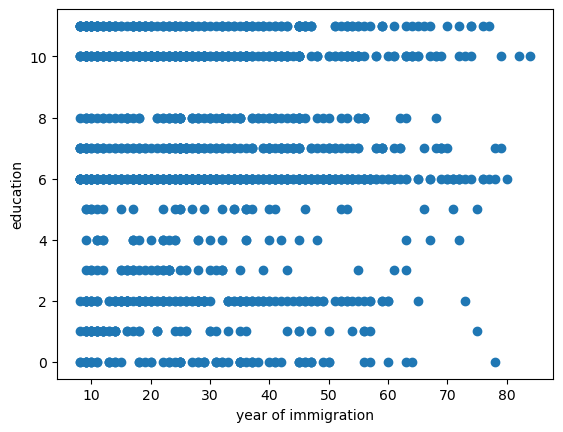

In [215]:
plt.plot(yrimmig_modified,educ,"o");
plt.ylabel("education");
plt.xlabel("year of immigration");

<font color='red'>**ANSWER**: 
    
1. Is there a positive relationship between year of immigration and the education attainment?

2. By computing the corr. directly and drawing the scatter plot, we can see that there is not a significant relationship between education and year of immigration.
   
3. The outcome is not ideal which means there is some thing wrong with my theoretical analysis or my data analysis. As far as I am concerned, it is likely that my expected conclusion is not stable under the fact that immigrants in US are composed of various people, including those with advanced technology as well as those who are not willing to get educated. The overall effect is not clear, which lead to a bad result of my research.
  
4. Yes. If there is a dummy variable which distinguish those well-educated immigrants and those with poor education, using linear regression with fixed effect, I hope i will get a better result.


</font>

## 7. Reflection (3 points)

Please reflect on how the homework went by going to Canvas, going to the Quizzes link, and clicking on *Reflection on homework 2*.

## 8. Submission

Once you're finished filling in and running all cells, you should submit your assignment as a .pdf on Gradescope. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. **NOTE:** When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. Failure to mark pages correctly will result in points being deducted from your homework score.

If you are running Jupyter Notebooks through an Anaconda installation on your own computer, you can produce the .pdf by completing the following steps:  
1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as" (or "Save and Export Notebook As...") and select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf

If you are running the assignment in a Google Colabs, you can use the following instructions: 
1.  Go to "File" at the top-left of your Jupyter Notebook and select "File" and "Print" (note you will not actually be printing)
2. From the print window, select the option to save as a .pdf
3. Be sure to look over the pdf file to make sure all your code and written work is saved in a clear way.

